<a href="https://colab.research.google.com/github/kgriffin04/python_code/blob/main/My_Meta_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Meta Data
The below code is based on a journey of self-assesment over a **41 day period**, with the plan in the future to extend the duration of this personal observation.

 Looking at my meta data and measurements of **sleep**, **caffeine intake**, **gym days**, and **mood (1-10)** in hopes to gain a better understanding of daily habits and potential improvements I can make in day-to-day life through the analyzation, representation and visualization of these recorded stats.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://github.com/kgriffin04/python_code/raw/refs/heads/main/My_Meta_Data(Sheet1).csv')
df

,day_number,day_type,sleep_hours,gym,caffeine_intake_esspresso_shot,mood_1_to_10
0,1,Thurs,7.0,Pull (Arm - Focused),1,8.0
1,2,Mon,6.5,Push (Chest - Focused),2,4.5
2,3,Tues,8.0,N/A,0,6.0
3,4,Wed,6.0,N/A,1,6.5
4,5,Thurs,6.0,Push (Arms - Focused),2,7.5
5,6,Fri,4.0,Pull (Back - Focused),2,8.0
6,7,Mon,7.0,N/A,2,7.5
7,8,Tues,5.5,N/A,1,6.0
8,9,Wed,6.5,N/A,1,10.0
9,10,Thurs,7.5,N/A,1,7.5


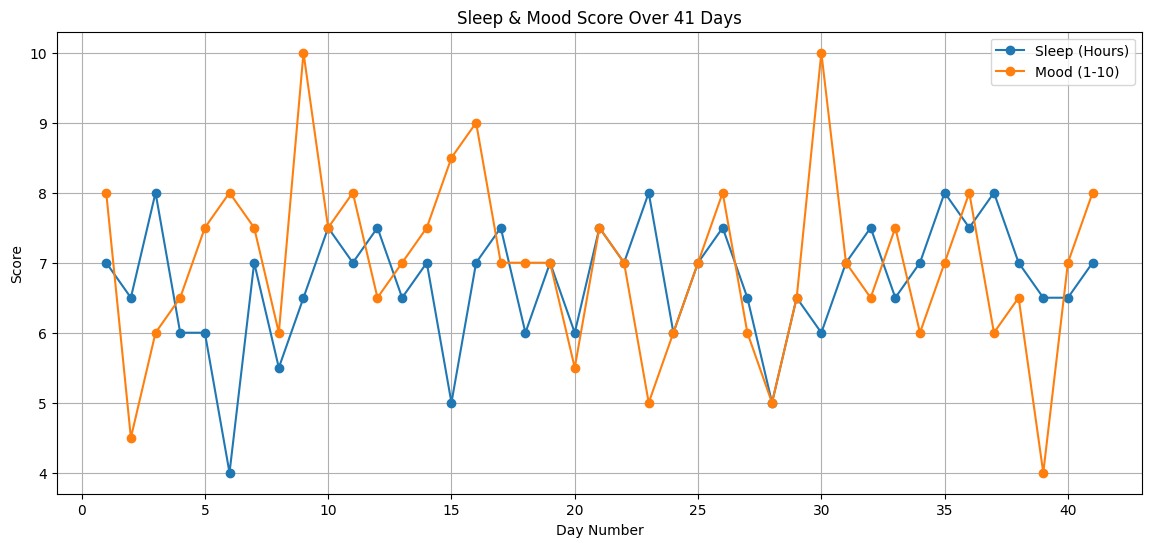

In [4]:
plt.figure(figsize=(14, 6))


plt.plot(df['day_number'], df['sleep_hours'], marker='o', label= 'Sleep (Hours)')
plt.title('Sleep & Mood Score Over 41 Days')
plt.xlabel('Day Number')
plt.ylabel('Score')
plt.grid(True)


plt.plot(df['day_number'], df['mood_1_to_10'], marker='o', label= 'Mood (1-10)')
plt.title('Sleep & Mood Score Over 41 Days')
plt.xlabel('Day Number')
plt.ylabel('Score')
plt.grid(True)

plt.legend()
plt.show()

In [5]:
df[['sleep_hours', 'caffeine_intake_esspresso_shot', 'mood_1_to_10']].corr()

,sleep_hours,caffeine_intake_esspresso_shot,mood_1_to_10
sleep_hours,1.000000,-0.151611,-0.057213
caffeine_intake_esspresso_shot,-0.151611,1.000000,0.229125
mood_1_to_10,-0.057213,0.229125,1.000000


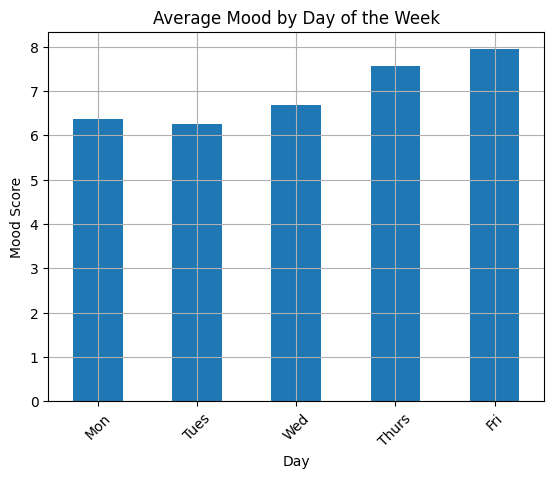

In [6]:
weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
avg_mood_by_day = df.groupby('day_type')['mood_1_to_10'].mean().reindex(weekday_order)
avg_mood_by_day.plot(kind= 'bar',
                     title= 'Average Mood by Day of the Week',
                     ylabel= 'Mood Score',
                     xlabel= 'Day')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

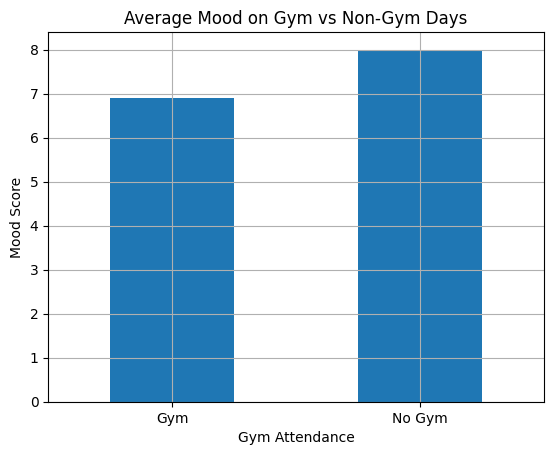

In [11]:
import matplotlib.pyplot as plt

#Initialize gym_attended as True for all rows
df['gym_attended'] = True

# Example: Setting gym attendance to False for specific days
df.loc[[0, 5, 10], 'gym_attended'] = False  # Replace indices with actual non-gym days

df['gym_attended'] = df['gym_attended'].map({True: 'Gym', False: 'No Gym'})

avg_mood_by_gym = df.groupby('gym_attended')['mood_1_to_10'].mean()
avg_mood_by_gym.plot(kind='bar', title='Average Mood on Gym vs Non-Gym Days', ylabel='Mood Score', xlabel='Gym Attendance')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()






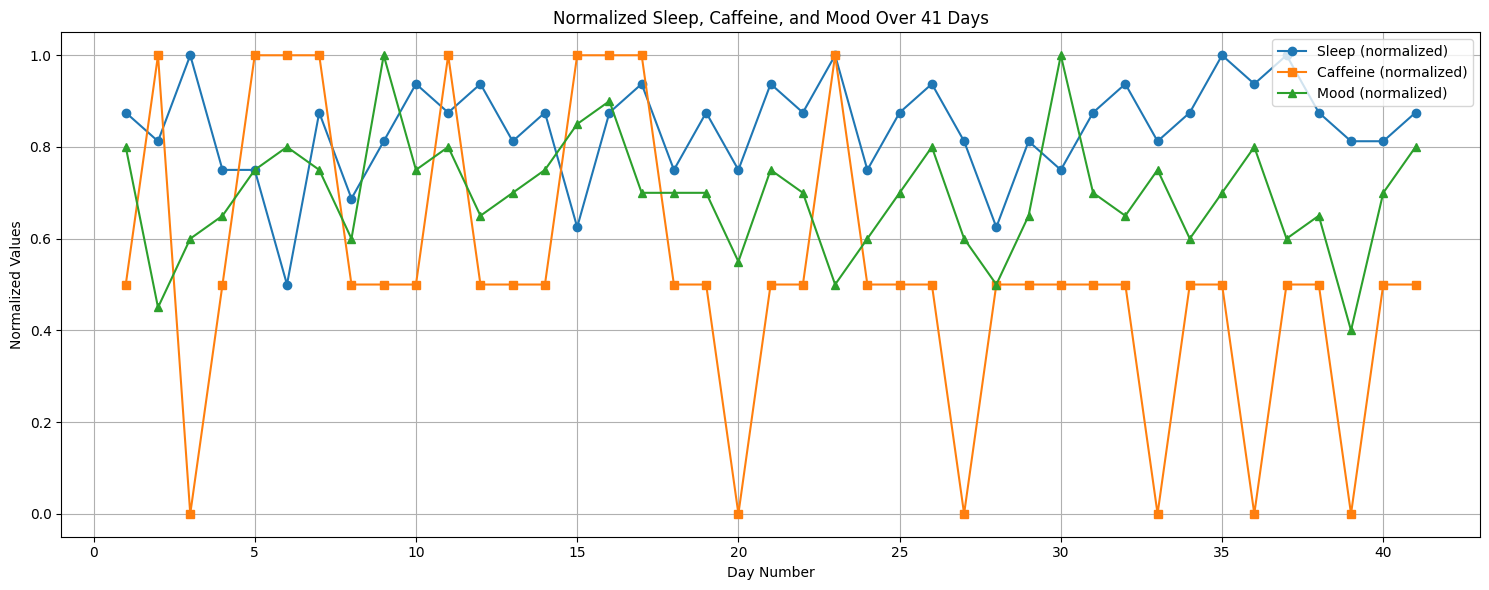

In [9]:
# Normalize the values for better comparison on the same y-axis
df_normalized = df.copy()
df_normalized['sleep_hours_norm'] = df['sleep_hours'] / df['sleep_hours'].max()
df_normalized['caffeine_intake_norm'] = df['caffeine_intake_esspresso_shot'] / df['caffeine_intake_esspresso_shot'].max()
df_normalized['mood_norm'] = df['mood_1_to_10'] / 10  # since mood is on a scale of 1-10

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df['day_number'], df_normalized['sleep_hours_norm'], label='Sleep (normalized)', marker='o')
plt.plot(df['day_number'], df_normalized['caffeine_intake_norm'], label='Caffeine (normalized)', marker='s')
plt.plot(df['day_number'], df_normalized['mood_norm'], label='Mood (normalized)', marker='^')

plt.title('Normalized Sleep, Caffeine, and Mood Over 41 Days')
plt.xlabel('Day Number')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
